**Weapon Target Allocation Notebook**

Use splitting to solve the weapon target allocation problem.

*Author: Peter Barkley*

*Date: 12/14/2020*

$$\min \sum_{i=1}^{n} V_i\prod_{j=1}^{m} (1 - Pk_{ij})^{x_{ij}}$$

$$\text{s.t.} \sum_{i=1}^{n} x_{ij} \le 1, \forall j$$

In [73]:
# Libraries
import numpy as np
import cvxpy as cp
import pydeck as pdk
import pandas as pd
import wta
import geopy.distance

np.set_printoptions(precision=3, suppress=True)

In [74]:
# Generate scenario
# five enemy combatants in an X, 
# 6 friendly UxS: 2 UUV, 2 USV, 2 UAV
# Inventory: 6 torpedoes per UUV, 4 missiles per USV, 2 missiles per UAV
# Torpedoes: 2 nm range, high damage
# Missiles: 60 nm range from USV, medium damage
# Missiles: 80 nm range from UAV, medium damage
# Center enemy is highest value
# Front two enemy are lowest value
# Left back is medium value
# Right back is medium-high value



In [75]:
# Location center

reference_location = np.array([23.5833, 119.5833])
ship_center = np.array([23.5833, 119.433])
uas_center = np.array([23.59, 119.9533])

In [83]:
# Create json file for map with lat/long
# like [{"lat":50.5112014,"lon":6.9939896,"value":5,"type":"ferry"},
# Center enemy will be reference location plus 0.1 lat, 0.1 long

# Create json file for map with lat/long
n = 5
m = 6
# Lat and long each start with ship center and add offset to form X
tgt_lat = ship_center[0] + [0, 0.1, 0.1, -0.1, -0.1]
tgt_lon = ship_center[1] + [0, 0.1, -0.1, 0.1, -0.1]

# Lat and long each start with uas center and add offset to form X
uxs_lat = uas_center[0] + [0, 0.1, 0.1, -0.1, -0.1, -0.2]
uxs_lon = uas_center[1] + [0, 0.1, -0.1, 0.1, -0.1, 0]

lat = np.concatenate((tgt_lat, uxs_lat))
lon = np.concatenate((tgt_lon, uxs_lon))

tgt_values = np.array([5, 1, 1, 3, 4])
value = np.concatenate((tgt_values, [0, 0, 0, 0, 0, 0]))
shiptypes = np.array(["ferry", "ship", "ferry", "ship", "ferry"])
uxvtypes = np.array(["uav", "uav", "usv", "usv", "uuv", "uuv"])
platform_types = np.concatenate((shiptypes, uxvtypes))
# data = np.concatenate(np.array([lat, lon, value]), shiptypes)
# data = data.T
# data = data.tolist()
# data = [{"lat": data[i][0], "lon": data[i][1], "value": data[i][2], "type": data[i][3]} for i in range(n+m)]

# # Save data to json file
# import json
# with open("data.json", "w") as outfile:
#     json.dump(data, outfile)

# # Print data    
# print(data)



battleship.png
drone.png
drone_icon_down.png
drone_icon_left.png
drone_icon_right.png
drone_icon_up.png
drone_icon_up_right.png #OK - faces west
fb_warship_down_left.jpg
fb_warship_down_right.jpeg
fb_warship_down_right_2.jpeg
ferry.bmp
ferry_left.png #Bad
ferry_right.png
filenames.txt
large.bmp
reaper.jpg
red-october-submarine-3d-model-3dm.bmp
ship_icons.jpg
ship_icon_up_left.jpg
ship_icon_up_left.png
ship_icon_up_right.png #OK - faces west
sub_down_left.png
sub_down_right.png #OK - faces south
ww2.bmp


In [84]:
# Map
BASE_URL = 'https://raw.githubusercontent.com/peterbarkley/wta/main/images/'
FERRY_URL = BASE_URL + 'ferry_right.png'
SHIP_URL = BASE_URL + 'warship_054A_down_right.png'
SUB_URL = BASE_URL + 'sub_up_left.png'
UAV_URL = BASE_URL + 'drone_icon_up_left.png'
USV_URL = BASE_URL + 'ship_icon_up_left.png'

# Dictionary of URLs by platform
ICON_URL = {
    "ferry": FERRY_URL,
    "ship": SHIP_URL,
    "sub": SUB_URL,
    "uav": UAV_URL,
    "uuv": SUB_URL,
    "usv": USV_URL,
}

dim = {}
for platform in ICON_URL:
    if platform in ["uav", "uuv", "usv"]:
        dim[platform] = 120
    else:
        dim[platform] = 242


# Icon data for each platform (UAV, FERRY, SHIP, SUB)
icon_data = {}
for platform in ICON_URL:
    d = dim[platform]
    icon_data[platform] = {
        "url": ICON_URL[platform],
        "width": d,
        "height": d,
        "anchorY": d,
    }

data = pd.read_json("data.json")

data["icon_data"] = None
for i in data.index:
    data["icon_data"][i] = icon_data[data["type"][i]]



view_state = pdk.ViewState(
    latitude=float(reference_location[0]),
    longitude=float(reference_location[1]),
    zoom=10,
    bearing=-45,
    pitch=60,
)


icon_layer = pdk.Layer(
    type="IconLayer",
    data=data,
    get_icon="icon_data",
    get_size=4,
    size_scale=15,
    get_position=["lon", "lat"],
    pickable=True,
    auto_highlight=True,
)



r = pdk.Deck(layers=[icon_layer], 
    initial_view_state=view_state, 
    map_style=pdk.map_styles.LIGHT,)# map_provider="mapbox", map_style=pdk.map_styles.SATELLITE)

r.to_html("icon_layer.html")

C:\Users\peter\AppData\Local\Temp\ipykernel_31864\2121766535.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["icon_data"][i] = icon_data[data["type"][i]]
C:\Users\peter\AppData\Local\Temp\ipykernel_31864\2121766535.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["icon_data"][i] = icon_data[data["type"][i]]
C:\Users\peter\AppData\Local\Temp\ipykernel_31864\2121766535.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [92]:
# Generate scenario data for target values, Pk, and 
uxs_weapons = {'uav': 2, 'uuv': 4, 'usv': 6}
uxs_base_pk = {'uav': 0.2, 'uuv': 0.3, 'usv': 0.1}

weapon_count = [uxs_weapons[t] for t in uxvtypes]

q = np.zeros((n,m))
ds = []
for i in range(n):
    for j in range(m):
        d = geopy.distance.distance((tgt_lat[i], tgt_lon[i]), (uxs_lat[j], uxs_lon[j])).nm
        loc_damage = 1/(d-2)
        ds.append(d)
        q[i, j] = 1 - (min(.05, loc_damage) + uxs_base_pk[uxvtypes[j]])+ 0.1/tgt_values[i]
print(q)

[[0.783 0.789 0.875 0.889 0.674 0.685]
 [0.854 0.862 0.95  0.965 0.75  0.763]
 [0.869 0.873 0.962 0.975 0.765 0.773]
 [0.788 0.799 0.883 0.896 0.683 0.688]
 [0.795 0.8   0.891 0.898 0.688 0.694]]


In [114]:
prob_val, x_full = wta.wta(Q, tgt_values*10, weapon_count)

print("Non-integer")
prov_val, x_full = wta.wta(Q, tgt_values*10, weapon_count, integer=False)

optimal
The optimal value is 39.14712812788784
A solution x is
[[2. 1. 6. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 4.]
 [0. 1. 0. 1. 4. 0.]]
Non-integer
optimal
The optimal value is 39.02259853613735
A solution x is
[[0.204 2.    6.    6.    0.    0.   ]
 [0.    0.    0.    0.    0.352 0.   ]
 [0.    0.    0.    0.    0.105 0.   ]
 [1.796 0.    0.    0.    0.    2.837]
 [0.    0.    0.    0.    3.543 1.163]]


In [95]:
def get_final_surv_prob(q, x):
    """
    Get the final probability of kill for each target.
    Inputs:
        q: (n,m) array of survival probabilities
        x: (n,m) array of weapon assignments
    """
    return np.prod(np.power(q, x), axis=1)

In [96]:
get_final_surv_prob(q, x)

array([0.131, 0.904, 0.972, 0.225, 0.173])

In [97]:
# Get the value of the problem if each platform solves independently

def get_ind_value(q, V, W):
    """
    Get the total value if each platform solves independently.
    Inputs:
        q: (n,m) array of survival probabilities
        V: (n,) array of target values
        W: (m,) array of weapon counts
    """
    # Loop through platforms
    n, m = q.shape
    x = np.zeros((n,m))
    for i in range(m):
        # Solve the WTA problem for platform i
        q_i = q[:,i]
        q_i = q_i.reshape((n,1))
        pv, x_i = wta.wta(q_i, V, W[i])
        x[:,i] = x_i[:,0]
    return V@get_final_surv_prob(q, x), x

In [99]:
V = tgt_values*10
WW = weapon_count

ind_value, ind_x = get_ind_value(q, V, WW)
print(ind_value)
print(ind_x)

optimal
The optimal value is 120.61671742856205
A solution x is
[[2.]
 [0.]
 [0.]
 [0.]
 [0.]]
optimal
The optimal value is 121.16396305267038
A solution x is
[[2.]
 [0.]
 [0.]
 [0.]
 [0.]]
optimal
The optimal value is 110.99351486116748
A solution x is
[[ 4.]
 [ 0.]
 [-0.]
 [ 0.]
 [ 2.]]
optimal
The optimal value is 113.57500064831076
A solution x is
[[ 4.]
 [-0.]
 [-0.]
 [ 0.]
 [ 2.]]
optimal
The optimal value is 90.72949907711016
A solution x is
[[2.]
 [0.]
 [0.]
 [1.]
 [1.]]
optimal
The optimal value is 91.89485572144514
A solution x is
[[2.]
 [0.]
 [0.]
 [1.]
 [1.]]
47.82060488294961
[[ 2.  2.  4.  4.  2.  2.]
 [ 0.  0.  0. -0.  0.  0.]
 [ 0.  0. -0. -0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.]
 [ 0.  0.  2.  2.  1.  1.]]


In [100]:
# Algorithm
z = np.zeros(m)
# W = np.array([[ 0.167, -0.055, -0.028, -0.028, -0.055, 0   ],
#  [-0.055,  0.167, -0.028, -0.028, 0,      -0.055],
#  [-0.028, -0.028,  0.139, -0.028, -0.028, -0.028],
#  [-0.028, -0.028, -0.028,  0.139, -0.028, -0.028],
#  [-0.055,  0,     -0.028, -0.028,  0.167, -0.055],
#  [0,      -0.055, -0.028, -0.028, -0.055,  0.167]])
# L = np.array([z, z, z,
#  [ 1.842,  0.127,  0.03,  0,    0,    0  ],
#  [ 0.118,  1.764,  0.119, 0,    0,    0   ],
#  [ 0.042,  0.109,  1.85,  0,    0,    0   ]])

M = np.array([[-1, 1, 0, 0, 0, 0],
     [0, -1, 1, 0, 0, 0],
     [0, 0, -1, 1, 0, 0],
     [0, 0, 0, -1, 1, 0],
     [0, 0, 0, 0, -1, 1]])

W = M.T@M
L = np.array([[0, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [1, 0, 0, 0, 1, 0]])

print(np.linalg.eigvals(W + L + L.T - 2*np.eye(6)))
print(W)
print(L)

[ 0. -2.  0.  0.  0.  0.]
[[ 1 -1  0  0  0  0]
 [-1  2 -1  0  0  0]
 [ 0 -1  2 -1  0  0]
 [ 0  0 -1  2 -1  0]
 [ 0  0  0 -1  2 -1]
 [ 0  0  0  0 -1  1]]
[[0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 1 0]]


In [101]:
# Data
n = 6
tgts = 5
wpns = 6
m = (tgts, wpns)
# Survival probabilities
#Q = q

# Target values
V = tgt_values*10

# Weapon values
WW = weapon_count

In [102]:
Q

array([[0.783, 0.789, 0.875, 0.889, 0.674, 0.685],
       [0.854, 0.862, 0.95 , 0.965, 0.75 , 0.763],
       [0.869, 0.873, 0.962, 0.975, 0.765, 0.773],
       [0.788, 0.799, 0.883, 0.896, 0.683, 0.688],
       [0.795, 0.8  , 0.891, 0.898, 0.688, 0.694]])

In [103]:
p, x = wta.wta(Q, V, WW, integer=False)

optimal
The optimal value is 39.02259853613735
A solution x is
[[0.204 2.    6.    6.    0.    0.   ]
 [0.    0.    0.    0.    0.352 0.   ]
 [0.    0.    0.    0.    0.105 0.   ]
 [1.796 0.    0.    0.    0.    2.837]
 [0.    0.    0.    0.    3.543 1.163]]


In [ ]:
[[1.451 1.166 3.567 3.344 2.875 2.394]
 [0.    0.    0.    0.    0.    0.   ]
 [0.549 0.834 2.433 2.656 1.125 1.606]
 [0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.   ]]

array([[0.4, 0.4, 1.2, 1.2, 0.8, 0.8],
       [0.4, 0.4, 1.2, 1.2, 0.8, 0.8],
       [0.4, 0.4, 1.2, 1.2, 0.8, 0.8],
       [0.4, 0.4, 1.2, 1.2, 0.8, 0.8],
       [0.4, 0.4, 1.2, 1.2, 0.8, 0.8]])

In [121]:

itrs = 1001
gamma = 0.5

v0 = []
vk = []
log = []
log_e = []
for i in range(n):
    vi = 1/tgts*np.array(WW)*np.ones(m)
    v0.append(vi)
    vk.append(vi.copy())

node_tgts = {0:[0, 1], 1:[1,2], 2:[2,3], 3:[3,4], 4:[4,0], 5:[1, 4]}
num_nodes_per_tgt = [2, 3, 2, 2, 3]

In [122]:
# Create variables/params/objs for the algorithm
probs = [] # List of problems for each node
all_x = [] # List of last x solutions for each node as params
all_v = [] # List of last v solutions for each node as params
all_w = []# List of variables for each node
for i in range(n):
    w = cp.Variable(m)
    all_w.append(w)
    x = cp.Parameter(m)
    x.value = np.zeros(m)
    all_x.append(x)
    v = cp.Parameter(m)
    v.value = v0[i]
    all_v.append(v)
    y = v + sum(L[i,j]*all_x[j] for j in range(i)) + L[i,i]*w
    qq = np.ones(m)
    qq[node_tgts[i]] = Q[node_tgts[i]] # Only use the targets that are in the node
    weighted_weapons = cp.multiply(w, np.log(qq)) # (tgts, wpns)
    survival_probs = cp.exp(cp.sum(weighted_weapons, axis=1)) # (tgts,)
    VV = np.zeros(tgts)
    VV[node_tgts[i]] = V[node_tgts[i]]
    VV = VV/num_nodes_per_tgt
    obj = cp.Minimize(VV@survival_probs + .5*cp.sum_squares(w - y))
    cons = [w >= 0, cp.sum(w, axis=0) <= WW]
    probs.append(cp.Problem(obj, cons))

In [123]:
for itr in range(itrs):
    #print("Iteration", itr)
    e = 0
    for i in range(n):
        probs[i].solve()
        if itr % 500 == 0:
            print("Iteration", itr, "Node", i)
            print(all_w[i].value)
        e += np.linalg.norm(all_w[i].value - all_x[i].value)
        all_x[i].value = all_w[i].value
    log_e.append(e)
    for i in range(n):
        vk[i] -= gamma*sum(W[i,j]*all_x[j].value for j in range(n))
        all_v[i].value = vk[i]
    log.append(V@get_final_surv_prob(Q, all_x[0].value))
    if itr % 500 == 0:
        print("v", vk)


Iteration 0 Node 0
[[0.948 0.93  1.511 1.475 1.671 1.636]
 [0.449 0.442 1.183 1.173 0.922 0.91 ]
 [0.201 0.209 1.102 1.117 0.469 0.485]
 [0.201 0.209 1.102 1.117 0.469 0.485]
 [0.201 0.209 1.102 1.117 0.469 0.485]]
Iteration 0 Node 1
[[0.834 0.821 1.477 1.452 1.456 1.431]
 [0.553 0.537 1.22  1.199 1.105 1.079]
 [0.44  0.441 1.165 1.16  0.929 0.931]
 [0.087 0.1   1.069 1.095 0.255 0.28 ]
 [0.087 0.1   1.069 1.095 0.255 0.28 ]]
Iteration 0 Node 2
[[0.575 0.579 1.376 1.366 1.046 1.037]
 [0.293 0.296 1.119 1.112 0.695 0.685]
 [0.495 0.504 1.15  1.131 1.12  1.117]
 [0.637 0.621 1.389 1.382 1.139 1.16 ]
 [0.    0.    0.967 1.008 0.    0.   ]]
Iteration 0 Node 3
[[0.295 0.31  1.233 1.236 0.593 0.595]
 [0.013 0.027 0.976 0.983 0.242 0.243]
 [0.215 0.235 1.007 1.001 0.667 0.675]
 [0.884 0.848 1.521 1.495 1.528 1.546]
 [0.593 0.58  1.263 1.285 0.969 0.942]]
Iteration 0 Node 4
[[0.779 0.79  1.569 1.527 1.506 1.468]
 [0.    0.    0.819 0.842 0.    0.   ]
 [0.    0.    0.85  0.861 0.128 0.157]
 [0.

In [124]:
V@wta.get_final_surv_prob(Q, all_w[0].value)

39.14327448668948

In [125]:
all_w[0].value

array([[0.814, 1.086, 5.01 , 3.769, 1.162, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.35 , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.102, 0.   ],
       [1.186, 0.   , 0.99 , 1.222, 0.17 , 2.339],
       [0.   , 0.914, 0.   , 1.009, 2.214, 1.661]])

In [ ]:
[[0.204 2.    6.    6.    0.    0.   ]
 [0.    0.    0.    0.    0.352 0.   ]
 [0.    0.    0.    0.    0.105 0.   ]
 [1.796 0.    0.    0.    0.    2.837]
 [0.    0.    0.    0.    3.543 1.163]]

array([50, 10, 10, 30, 40])

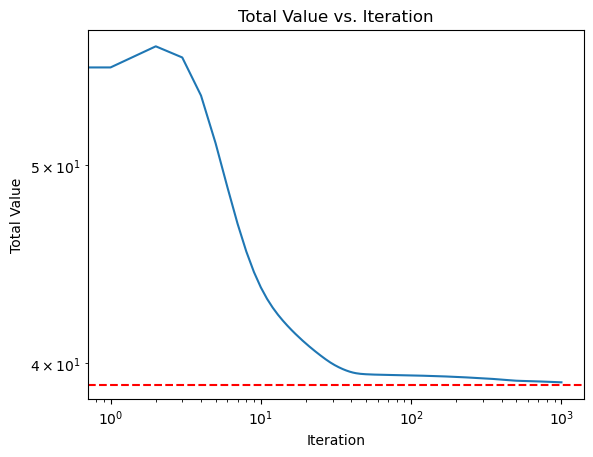

In [126]:
# Plot log values using log/log scale
import matplotlib.pyplot as plt

plt.plot(log)
plt.yscale("log")
plt.xscale("log")

# Add horizontal line at y = x_full
plt.axhline(y=p, color='red', linestyle='dashed')
plt.xlabel("Iteration")
plt.ylabel("Total Value")
plt.title("Total Value vs. Iteration")
plt.show()


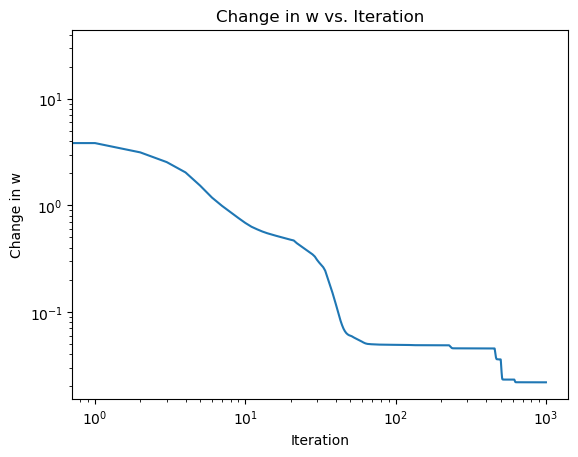

In [127]:
# Plot log_e values using log/log scale
plt.plot(log_e)
plt.yscale("log")
plt.xscale("log")

# Label axes
plt.xlabel("Iteration")
plt.ylabel("Change in w")
plt.title("Change in w vs. Iteration")
plt.show()